  

recommendation-systems

  

December 26, 2023

  

1.  # <span id="bookmark0">Description</span>

    -   Context Online E-commerce websites like Amazon, Flipkart uses
        different recommendation models to provide different suggestions
        to different users. Amazon currently uses item-to-item
        collaborative filtering, which scales to massive data sets and
        produces high-quality recommendations in real-tim

          

        \[213\]:

        •

        Domain: E-coerce\*\*

        : Bbjective Build a recommendation system to recommend products
        to customers based on their previous ratings for other products.
        Apply the concepts and techniques you have learned in the
        previous weeks and summarise your insights ah\* e end. :

        Dataset We are using the Electronics dataset from the Amazon
        Reviews data repository, which has several datasets.

        Attribute Information

        \# lets start by importing libraries

          

        import <span style=" color: #00F;">pandas </span>as <span
        style=" color: #00F;">pd </span>import <span
        style=" color: #00F;">numpy </span>as <span
        style=" color: #00F;">np</span>

        import <span style=" color: #00F;">matplotlib.pyplot </span>as
        <span style=" color: #00F;">plt </span>import <span
        style=" color: #00F;">seaborn </span>as <span
        style=" color: #00F;">sns</span>

        from <span style=" color: #00F;">sklearn.metrics.pairwise
        </span>import <span class="p">cosine_similarity</span>

        from <span style=" color: #00F;">sklearn.metrics </span>import
        <span class="p">mean_squared_error</span>

        from <span style=" color: #00F;">scipy.sparse.linalg
        </span>import <span class="p">svds</span>

        import <span style=" color: #00F;">warnings</span>

        warnings<span style=" color: #666;">.</span>filterwarnings(<span
        style=" color: #BA2121;">'ignore'</span>)

        userId: Every user identified with a unique id productId: Every
        product identified with a unique id Rating: Rating of the
        corresponding product by the corresponding user timestamp: Time
        of the rating ( ignore this column for this exercise)

          

        <span class="s6">from </span><span class="s7">google.colab
        </span><span class="s6">import </span>drive drive<span
        style=" color: #666;">.</span>mount(<span
        style=" color: #BA2121;">'/content/drive'</span>)

        \[214\]:

2.  # <span id="bookmark1">Loading data set</span>

      

      

    \[215\]:

      

    \# now lets load our data set

    data <span style=" color: #666;">= </span>pd<span
    style=" color: #666;">.</span>read_csv(<span
    style=" color: #BA2121;">'/content/drive/MyDrive/ratings_Electronics.csv'</span>,<span
    style=" color: #F00;">␣</span>

    <span class="s15">𝗌</span>header<span
    style=" color: #666;">=</span><span class="s6">None</span>)

    Drive already mounted at /content/drive; to attempt to forcibly
    remount, call drive.mount("/content/drive", force_remount=True).

      

    \# let's check how our data looks like

    data<span style=" color: #666;">.</span>head()

    \[216\]:

      

    |                  |                           |
    |------------------|---------------------------|
    | 0 AKM1MP6P0OYPR  | 0132793040 5.0 1365811200 |
    | 1 A2CX7LUOHB2NDG | 0321732944 5.0 1341100800 |
    | 2 A2NWSAGRHCP8N5 | 0439886341 1.0 1367193600 |
    | 3 A2WNBOD3WNDNKT | 0439886341 3.0 1374451200 |
    | 4 A1GI0U4ZRJA8WN | 0439886341 1.0 1334707200 |

    \[216\]: <span style=" color: #000;">0 1 2 3</span>

      

      

    <span style=" background-color: #F7F7F7;"> </span><span
    style=" background-color: #F7F7F7;">data</span><span
    style=" background-color: #F7F7F7;">.</span><span
    style=" background-color: #F7F7F7;">columns </span><span
    style=" background-color: #F7F7F7;">= </span><span
    style=" background-color: #F7F7F7;">\[</span><span
    style=" background-color: #F7F7F7;">"user_id"</span><span
    style=" background-color: #F7F7F7;">, </span><span
    style=" background-color: #F7F7F7;">"product_id"</span><span
    style=" background-color: #F7F7F7;">, </span><span
    style=" background-color: #F7F7F7;">"rating"</span><span
    style=" background-color: #F7F7F7;">, </span><span
    style=" background-color: #F7F7F7;">"timestamp"</span><span
    style=" background-color: #F7F7F7;">\] </span>

    \[217\]:

    <span style=" background-color: #F7F7F7;"> </span><span
    style=" background-color: #F7F7F7;">data </span><span
    style=" background-color: #F7F7F7;">= </span><span
    style=" background-color: #F7F7F7;">data</span><span
    style=" background-color: #F7F7F7;">.</span><span
    style=" background-color: #F7F7F7;">drop(</span><span
    style=" background-color: #F7F7F7;">'timestamp'</span><span
    style=" background-color: #F7F7F7;">, axis </span><span
    style=" background-color: #F7F7F7;">= 1</span><span
    style=" background-color: #F7F7F7;">) </span>

    \[218\]:

    \# now lets recheck the data

    data<span style=" color: #666;">.</span>head()

    \[219\]:

    -   oh, as we can see there is no header in our data set. Lets add
        headers also & as per requirements we can ignore the last column

          

        <table style="border-collapse:collapse;margin-left:5.148pt" data-cellspacing="0">
        <colgroup>
        <col style="width: 33%" />
        <col style="width: 33%" />
        <col style="width: 33%" />
        </colgroup>
        <tbody>
        <tr class="odd" style="height:14pt">
        <td style="width: 40pt"><p>[219]:</p></td>
        <td style="width: 175pt"><p>user_id product_id</p></td>
        <td style="width: 43pt"><p>rating</p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 175pt"><p>0 AKM1MP6P0OYPR 0132793040</p></td>
        <td style="width: 43pt"><p>5.0</p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 175pt"><p>1 A2CX7LUOHB2NDG 0321732944</p></td>
        <td style="width: 43pt"><p>5.0</p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 175pt"><p>2 A2NWSAGRHCP8N5 0439886341</p></td>
        <td style="width: 43pt"><p>1.0</p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 175pt"><p>3 A2WNBOD3WNDNKT 0439886341</p></td>
        <td style="width: 43pt"><p>3.0</p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 175pt"><p>4 A1GI0U4ZRJA8WN 0439886341</p></td>
        <td style="width: 43pt"><p>1.0</p></td>
        </tr>
        </tbody>
        </table>

          

        -   seems quite good now

    \# lets make a copy of original data set before moving forward

    df <span style=" color: #666;">= </span>data<span
    style=" color: #666;">.</span>copy(deep <span
    style=" color: #666;">= </span><span class="s6">True</span>)

    \[220\]:

    \# The deep=True argument ensures that the new DataFrame is a
    completely<span class="s16">␣</span>

    𝗌<span class="s5">independent copy of the original</span>

      

      

    \[221\]:

3.  # <span id="bookmark2">EDA</span>

      

    \# let's check shape of data

    df<span style=" color: #666;">.</span>shape

    \[221\]: <span style=" color: #000;">(7824482, 3)</span>

    -   our data has 7824481 rows & 3 cols

        \# lets now go through the dataset of our data

        df<span style=" color: #666;">.</span>info()

        \[222\]:

          

          

        \[223\]:

        \<class 'pandas.core.frame.DataFrame'> RangeIndex: 7824482
        entries, 0 to 7824481 Data columns (total 3 columns):

        \# Column Dtype

          

        1.  user_id object

        2.  product_id object

        3.  rating float64 dtypes: float64(1), object(2) memory usage:
            179.1+ MB

            \# lets check for missing vales in data

            df<span style=" color: #666;">.</span>isnull()<span
            style=" color: #666;">.</span>sum()

            -   we have user_id & product_id as object & rating as float

          

        1.  <span style=" color: #D74314;">: </span>user_id<span
            class="s14"> </span>0

            product_id<span class="s14"> </span>0

            rating<span class="s14"> </span>0

            dtype: int64

            -   we have no missing values in our dataset

                  

4.  # <span id="bookmark3">Some statistics:)</span>

      

    <span style=" background-color: #F7F7F7;"> </span><span
    style=" background-color: #F7F7F7;">df</span><span
    style=" background-color: #F7F7F7;">.</span><span
    style=" background-color: #F7F7F7;">describe()</span><span
    style=" background-color: #F7F7F7;">.</span><span
    style=" background-color: #F7F7F7;">T </span>

    \[224\]:

    1.  : <span style=" color: #000;">count mean std min 25% 50% 75%
        max</span>

        rating 7824482.0 4.012337 1.38091 1.0 3.0 5.0 5.0 5.0

          

        \[225\]:

        -   as per this we have a max rating of 5 & min rating of 1. AS
            EXPECTED

            \# lets check rating distribution

              

            plt<span style=" color: #666;">.</span>figure(figsize <span
            style=" color: #666;">= </span>(<span
            style=" color: #666;">12</span>, <span
            style=" color: #666;">6</span>)) df\[<span
            style=" color: #BA2121;">'rating'</span>\]<span
            style=" color: #666;">.</span>value_counts(<span
            style=" color: #666;">1</span>)<span
            style=" color: #666;">.</span>plot(kind <span
            style=" color: #666;">= </span><span
            style=" color: #BA2121;">'bar'</span>) plt<span
            style=" color: #666;">.</span>show()

        -   data seems to skewed right

              

            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
            |---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
            | 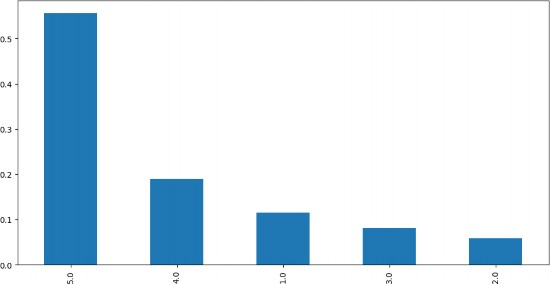 |

              

              

            \[226\]:

        -   majority of rating value is 5

        -   followed by 4

        -   & then directly 1

            \# what numbers of unique users we have

            df\[<span style=" color: #BA2121;">'user_id'</span>\]<span
            style=" color: #666;">.</span>nunique()

        -   hence confirmed data is skewed right

              

            \[226\]: <span style=" color: #000;">4201696</span>

            -   we have 4201696 number of unique users out of 7824481

                \# what numbers of unique products we have

                df\[<span
                style=" color: #BA2121;">'product_id'</span>\]<span
                style=" color: #666;">.</span>nunique()

                \[227\]:

                  

                \[227\]: <span style=" color: #000;">476002</span>

            -   we have 476001 number of unique products out of 7824481

    \# last 10 users who have rated frequently often

      

    most_rated <span style=" color: #666;">= </span>df<span
    style=" color: #666;">.</span>groupby(<span
    style=" color: #BA2121;">'user_id'</span>)<span
    style=" color: #666;">.</span>size()<span
    style=" color: #666;">.</span>sort_values(ascending <span
    style=" color: #666;">= </span><span
    class="s6">False</span>)\[:<span style=" color: #666;">10</span>\]
    most_rated

    \[228\]:

      

    \[228\]: <span style=" color: #000;">user_id</span>

    A5JLAU2ARJ0BO<span class="s14"> </span>520

    ADLVFFE4VBT8<span class="s14"> </span>501

    A3OXHLG6DIBRW8<span class="s14"> </span>498

    A6FIAB28IS79<span class="s14"> </span>431

    A680RUE1FDO8B<span class="s14"> </span>406

    A1ODOGXEYECQQ8<span class="s14"> </span>380

    A36K2N527TXXJN<span class="s14"> </span>314

    A2AY4YUOX2N1BQ<span class="s14"> </span>311

    AWPODHOB4GFWL<span class="s14"> </span>308

    A25C2M3QF9G7OQ<span class="s14"> </span>296

    dtype: int64

    -   Highest rating is by user_id A5JLAU2ARJ0BO of 520 which does not
        even lies in the range of number of product.

    -   means, we can recommend a lot variest of products to user which
        the user never interacted with

5.  # <span id="bookmark4">Data prep for model building</span>

    \# as, the rating columns for each user is highly scattered, we
    gonna clip the<span class="s16">␣</span>

    𝗌<span class="s5">data hacing given rating \>= 50 & vice
    versa</span>

      

    counts <span style=" color: #666;">= </span>df\[<span
    style=" color: #BA2121;">'user_id'</span>\]<span
    style=" color: #666;">.</span>value_counts()

    df_final <span style=" color: #666;">= </span>df\[df\[<span
    style=" color: #BA2121;">'user_id'</span>\]<span
    style=" color: #666;">.</span>isin(counts\[counts<span
    style=" color: #666;">\>=50</span>\]<span
    style=" color: #666;">.</span>index)\]

    \[229\]:

      

    <span style=" background-color: #F7F7F7;"> </span><span
    style=" background-color: #F7F7F7;">len</span><span
    style=" background-color: #F7F7F7;">(df_final) </span>

    \[230\]:

    \[230\]: <span style=" color: #000;">125871</span>

    -   we have 125871 number of observation in df_final cols. dataset
        where user has given rating

        <span style=" background-color: #F7F7F7;"> </span><span
        style=" background-color: #F7F7F7;">df_final\[</span><span
        style=" background-color: #F7F7F7;">'user_id'</span><span
        style=" background-color: #F7F7F7;">\]</span><span
        style=" background-color: #F7F7F7;">.</span><span
        style=" background-color: #F7F7F7;">nunique() </span>

        \[231\]:

        \[231\]: <span style=" color: #000;">1540</span>

    -   we have 1540 unique user in df_final dataset

        <span style=" background-color: #F7F7F7;"> </span><span
        style=" background-color: #F7F7F7;">df_final\[</span><span
        style=" background-color: #F7F7F7;">'product_id'</span><span
        style=" background-color: #F7F7F7;">\]</span><span
        style=" background-color: #F7F7F7;">.</span><span
        style=" background-color: #F7F7F7;">nunique() </span>

        \[232\]:

        \[232\]: <span style=" color: #000;">48190</span>

    -   we have 48190 unique products in df_final dataset

    -   checking the desity of rating matrix

        final_rating_matrix <span style=" color: #666;">=
        </span>df_final<span style=" color: #666;">.</span>pivot(index
        <span style=" color: #666;">= </span><span
        style=" color: #BA2121;">'user_id'</span>, columns <span
        style=" color: #666;">= </span><span
        style=" color: #BA2121;">'product_id'</span>,<span
        style=" color: #F00;">␣</span>

        <span class="s15">𝗌</span>values <span style=" color: #666;">=
        </span><span style=" color: #BA2121;">'rating'</span>)<span
        style=" color: #666;">.</span>fillna(<span
        style=" color: #666;">0</span>) final_rating_matrix<span
        style=" color: #666;">.</span>shape

        \[233\]:

          

        \[233\]: <span style=" color: #000;">(1540, 48190)</span>

    -   shape of final matrix is 1540 x 48190

        \# lets check for number of non zero entries in rating
        interaction matrix

          

        given_number_of_rating <span style=" color: #666;">=
        </span>np<span
        style=" color: #666;">.</span>count_nonzero(final_rating_matrix)
        given_number_of_rating

        \[234\]:

          

        \[234\]: <span style=" color: #000;">125871</span>

    -   we have 125871 number of non zero rating interactions

        \# possible rating as per number of user & ;prducts

        possible_num_of_ratings <span style=" color: #666;">=
        </span>final_rating_matrix<span
        style=" color: #666;">.</span>shape\[<span
        style=" color: #666;">0</span>\] <span style=" color: #666;">\*
        </span>final_rating_matrix<span style=" color: #666;">.</span>

        <span class="s15">𝗌</span>shape\[<span
        style=" color: #666;">1</span>\]

        possible_num_of_ratings

        \[235\]:

          

        \[235\]: <span style=" color: #000;">74212600</span>

    -   so max possible rating for products possible are 74212600

        \# calculating desity

          

        density <span style=" color: #666;">=
        </span>given_number_of_rating <span style=" color: #666;">/
        </span>possible_num_of_ratings density <span
        style=" color: #666;">\*= 100</span>

        density

        \[236\]:

          

        \[236\]: <span style=" color: #000;">0.1696086648358904</span>

    -   we have a 0.16% of density

        <span style=" background-color: #F7F7F7;"> </span><span
        style=" background-color: #F7F7F7;">final_rating_matrix</span><span
        style=" background-color: #F7F7F7;">.</span><span
        style=" background-color: #F7F7F7;">head(</span><span
        style=" background-color: #F7F7F7;">10</span><span
        style=" background-color: #F7F7F7;">) </span>

        \[237\]:

          

        <table style="border-collapse:collapse;margin-left:5.148pt" data-cellspacing="0">
        <colgroup>
        <col style="width: 16%" />
        <col style="width: 16%" />
        <col style="width: 16%" />
        <col style="width: 16%" />
        <col style="width: 16%" />
        <col style="width: 16%" />
        </colgroup>
        <tbody>
        <tr class="odd" style="height:14pt">
        <td style="width: 129pt"><p>[237]: <span style=" color: #000;">product_id</span></p></td>
        <td style="width: 69pt"><p>0594451647</p></td>
        <td style="width: 69pt"><p>0594481813</p></td>
        <td style="width: 69pt"><p>0970407998</p></td>
        <td style="width: 68pt"><p>0972683275</p></td>
        <td style="width: 83pt"><p>1400501466 \</p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 129pt"><p>user_id</p></td>
        <td style="width: 69pt"><p><br />
        </p></td>
        <td style="width: 69pt"><p><br />
        </p></td>
        <td style="width: 69pt"><p><br />
        </p></td>
        <td style="width: 68pt"><p><br />
        </p></td>
        <td style="width: 83pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 129pt"><p>A100UD67AHFODS</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 83pt"><p>0.0</p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 129pt"><p>A100WO06OQR8BQ</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 83pt"><p>0.0</p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 129pt"><p>A105S56ODHGJEK</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 83pt"><p>0.0</p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 129pt"><p>A105TOJ6LTVMBG</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 83pt"><p>0.0</p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 129pt"><p>A10AFVU66A79Y1</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 83pt"><p>0.0</p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 129pt"><p>A10H24TDLK2VDP</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 83pt"><p>0.0</p></td>
        </tr>
        </tbody>
        </table>

          

        <table style="border-collapse:collapse;margin-left:45.987pt" data-cellspacing="0">
        <colgroup>
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        </colgroup>
        <tbody>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10NMELR4KX0J6</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td rowspan="4" style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A10O7THJ2O20AG</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10PEXB6XAQ5XF</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        </tr>
        <tr class="even" style="height:21pt">
        <td style="width: 88pt"><p>A10X9ME6R66JDX</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        </tr>
        <tr class="odd" style="height:48pt">
        <td style="width: 88pt"><p>product_id user_id A100UD67AHFODS</p></td>
        <td style="width: 69pt"><p>1400501520</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>1400501776</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>1400532620</p>
        <p>0.0</p></td>
        <td style="width: 68pt"><p>1400532655</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>140053271X</p>
        <p>0.0</p></td>
        <td style="width: 14pt"><p>\</p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A100WO06OQR8BQ</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A105S56ODHGJEK</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A105TOJ6LTVMBG</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10AFVU66A79Y1</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A10H24TDLK2VDP</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10NMELR4KX0J6</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A10O7THJ2O20AG</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10PEXB6XAQ5XF</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A10X9ME6R66JDX</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        </tbody>
        </table>

          

        <table style="border-collapse:collapse;margin-left:45.987pt" data-cellspacing="0">
        <colgroup>
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        </colgroup>
        <tbody>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>product_id</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>B00L5YZCCG</p></td>
        <td style="width: 69pt"><p>B00L8I6SFY</p></td>
        <td style="width: 69pt"><p>B00L8QCVL6</p></td>
        <td style="width: 68pt"><p>B00LA6T0LS</p></td>
        <td style="width: 14pt"><p>\</p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>user_id</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p><br />
        </p></td>
        <td style="width: 69pt"><p><br />
        </p></td>
        <td style="width: 69pt"><p><br />
        </p></td>
        <td style="width: 68pt"><p><br />
        </p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A100UD67AHFODS</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A100WO06OQR8BQ</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A105S56ODHGJEK</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A105TOJ6LTVMBG</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10AFVU66A79Y1</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A10H24TDLK2VDP</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10NMELR4KX0J6</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A10O7THJ2O20AG</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10PEXB6XAQ5XF</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A10X9ME6R66JDX</p></td>
        <td style="width: 18pt"><p>…</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        </tbody>
        </table>

          

        <table style="border-collapse:collapse;margin-left:45.987pt" data-cellspacing="0">
        <colgroup>
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        <col style="width: 14%" />
        </colgroup>
        <tbody>
        <tr class="odd" style="height:42pt">
        <td style="width: 88pt"><p>product_id user_id A100UD67AHFODS</p></td>
        <td style="width: 69pt"><p>B00LBZ1Z7K</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>B00LED02VY</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>B00LGN7Y3G</p>
        <p>0.0</p></td>
        <td style="width: 68pt"><p>B00LGQ6HL8</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>B00LI4ZZO8</p>
        <p>0.0</p></td>
        <td style="width: 14pt"><p>\</p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A100WO06OQR8BQ</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A105S56ODHGJEK</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A105TOJ6LTVMBG</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10AFVU66A79Y1</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A10H24TDLK2VDP</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10NMELR4KX0J6</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 88pt"><p>A10O7THJ2O20AG</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 88pt"><p>A10PEXB6XAQ5XF</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:21pt">
        <td style="width: 88pt"><p>A10X9ME6R66JDX</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:48pt">
        <td style="width: 88pt"><p>product_id user_id A100UD67AHFODS</p></td>
        <td style="width: 69pt"><p>B00LKG1MC8</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p><br />
        </p></td>
        <td style="width: 69pt"><p><br />
        </p></td>
        <td style="width: 68pt"><p><br />
        </p></td>
        <td style="width: 69pt"><p><br />
        </p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        </tbody>
        </table>

          

        average_rating <span style=" color: #666;">=
        </span>df_final<span style=" color: #666;">.</span>groupby(<span
        style=" color: #BA2121;">'product_id'</span>)<span
        style=" color: #666;">.</span>mean()\[<span
        style=" color: #BA2121;">'rating'</span>\]

          

        count_rating <span style=" color: #666;">= </span>df_final<span
        style=" color: #666;">.</span>groupby(<span
        style=" color: #BA2121;">'product_id'</span>)<span
        style=" color: #666;">.</span>count()\[<span
        style=" color: #BA2121;">'rating'</span>\] final_rating <span
        style=" color: #666;">= </span>pd<span
        style=" color: #666;">.</span>DataFrame({<span
        style=" color: #BA2121;">'avg_rating'</span>:average_rating,
        <span style=" color: #BA2121;">'rating_count'</span>:

        𝗌<span class="p">count_rating})</span>

          

        final_rating <span style=" color: #666;">=
        </span>final_rating<span
        style=" color: #666;">.</span>sort_values(by<span
        style=" color: #666;">=</span><span
        style=" color: #BA2121;">'avg_rating'</span>,ascending<span
        style=" color: #666;">=</span><span class="s6">False</span>)
        final_rating<span style=" color: #666;">.</span>head()

        \[238\]:

        A100WO06OQR8BQ<span class="s14"> </span>0.0

        A105S56ODHGJEK<span class="s14"> </span>0.0

        A105TOJ6LTVMBG<span class="s14"> </span>0.0

        A10AFVU66A79Y1<span class="s14"> </span>0.0

        A10H24TDLK2VDP<span class="s14"> </span>0.0

        A10NMELR4KX0J6<span class="s14"> </span>0.0

        A10O7THJ2O20AG<span class="s14"> </span>0.0

        A10PEXB6XAQ5XF<span class="s14"> </span>0.0

        A10X9ME6R66JDX<span class="s14"> </span>0.0

        \[10 rows x 48190 columns\]

        -   even after subsetting the original data, the desity is quite
            low. i.e. of 0.16%… It tells that the data is highly
            scattered

          

6.  # <span id="bookmark5">Rank based recommendation system</span>

      

    <table style="border-collapse:collapse;margin-left:5.148pt" data-cellspacing="0">
    <colgroup>
    <col style="width: 25%" />
    <col style="width: 25%" />
    <col style="width: 25%" />
    <col style="width: 25%" />
    </colgroup>
    <tbody>
    <tr class="odd" style="height:28pt">
    <td style="width: 40pt"><p>[238]:</p></td>
    <td style="width: 66pt"><p>product_id</p></td>
    <td style="width: 69pt"><p>avg_rating</p></td>
    <td style="width: 77pt"><p>rating_count</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 40pt"><p><br />
    </p></td>
    <td style="width: 66pt"><p>0594451647</p></td>
    <td style="width: 69pt"><p>5.0</p></td>
    <td style="width: 77pt"><p>1</p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 40pt"><p><br />
    </p></td>
    <td style="width: 66pt"><p>B003RRY9RS</p></td>
    <td style="width: 69pt"><p>5.0</p></td>
    <td style="width: 77pt"><p>1</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 40pt"><p><br />
    </p></td>
    <td style="width: 66pt"><p>B003RR95Q8</p></td>
    <td style="width: 69pt"><p>5.0</p></td>
    <td style="width: 77pt"><p>1</p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 40pt"><p><br />
    </p></td>
    <td style="width: 66pt"><p>B003RIPMZU</p></td>
    <td style="width: 69pt"><p>5.0</p></td>
    <td style="width: 77pt"><p>1</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 40pt"><p><br />
    </p></td>
    <td style="width: 66pt"><p>B003RFRNYQ</p></td>
    <td style="width: 69pt"><p>5.0</p></td>
    <td style="width: 77pt"><p>2</p></td>
    </tr>
    </tbody>
    </table>

      

    \# fun to get ton n products on max rating & min interaction

    #defining a function to get the top n products based on highest
    average rating<span class="s16">␣</span>

    𝗌<span class="s5">and minimum interactions</span>

    def <span class="s17">top_n\_products</span><span
    class="p">(final_rating, n, min_interaction):</span>

    #Finding movies with minimum number of interactions

    recommendations <span style=" color: #666;">=
    </span>final_rating\[final_rating\[<span
    style=" color: #BA2121;">'rating_count'</span>\]<span
    style=" color: #666;">\></span>min_interaction\]

    #Sorting values w.r.t average rating

    recommendations <span style=" color: #666;">=
    </span>recommendations<span
    style=" color: #666;">.</span>sort_values(<span
    style=" color: #BA2121;">'avg_rating'</span>,ascending<span
    style=" color: #666;">=</span><span class="s6">False</span>)

    \[239\]:

    <span class="s6">return </span>recommendations<span
    style=" color: #666;">.</span>index\[:n\]

    ## recomending top 5 products having min interaction of 20

    <span style=" background-color: #F7F7F7;"> </span><span
    style=" background-color: #F7F7F7;">list</span><span
    style=" background-color: #F7F7F7;">(top_n\_products(final_rating,
    </span><span style=" background-color: #F7F7F7;">5</span><span
    style=" background-color: #F7F7F7;">, </span><span
    style=" background-color: #F7F7F7;">50</span><span
    style=" background-color: #F7F7F7;">)) </span>

    \[240\]:

      

    1.  : <span style=" color: #000;">\['B001TH7GUU', 'B003ES5ZUU',
        'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW'\]</span>

        ## recomending top 5 products having min interaction of 100

          

        <span style=" background-color: #F7F7F7;"> </span><span
        style=" background-color: #F7F7F7;">list</span><span
        style=" background-color: #F7F7F7;">(top_n\_products(final_rating,
        </span><span style=" background-color: #F7F7F7;">5</span><span
        style=" background-color: #F7F7F7;">, </span><span
        style=" background-color: #F7F7F7;">100</span><span
        style=" background-color: #F7F7F7;">)) </span>

        \[241\]:

    2.  : <span style=" color: #000;">\['B003ES5ZUU', 'B000N99BBC',
        'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC'\]</span>

      

      

    <span style=" background-color: #F7F7F7;"> </span><span
    style=" background-color: #F7F7F7;">final_rating_matrix</span><span
    style=" background-color: #F7F7F7;">.</span><span
    style=" background-color: #F7F7F7;">head() </span>

    <table style="border-collapse:collapse" data-cellspacing="0">
    <colgroup>
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    </colgroup>
    <tbody>
    <tr class="odd" style="height:42pt">
    <td style="width: 40pt"><p>[242]:</p></td>
    <td style="width: 89pt"><p>product_id user_id A100UD67AHFODS</p></td>
    <td style="width: 69pt"><p>0594451647</p>
    <p>0.0</p></td>
    <td style="width: 69pt"><p>0594481813</p>
    <p>0.0</p></td>
    <td style="width: 69pt"><p>0970407998</p>
    <p>0.0</p></td>
    <td style="width: 68pt"><p>0972683275</p>
    <p>0.0</p></td>
    <td style="width: 69pt"><p>1400501466</p>
    <p>0.0</p></td>
    <td style="width: 14pt"><p>\</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 40pt"><p><br />
    </p></td>
    <td style="width: 89pt"><p>A100WO06OQR8BQ</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 14pt"><p><br />
    </p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 40pt"><p><br />
    </p></td>
    <td style="width: 89pt"><p>A105S56ODHGJEK</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 14pt"><p><br />
    </p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 40pt"><p><br />
    </p></td>
    <td style="width: 89pt"><p>A105TOJ6LTVMBG</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 14pt"><p><br />
    </p></td>
    </tr>
    <tr class="odd" style="height:21pt">
    <td style="width: 40pt"><p><br />
    </p></td>
    <td style="width: 89pt"><p>A10AFVU66A79Y1</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 14pt"><p><br />
    </p></td>
    </tr>
    <tr class="even" style="height:35pt">
    <td style="width: 40pt"><p><br />
    </p></td>
    <td style="width: 89pt"><p>product_id user_id</p></td>
    <td style="width: 69pt"><p>1400501520</p></td>
    <td style="width: 69pt"><p>1400501776</p></td>
    <td style="width: 69pt"><p>1400532620</p></td>
    <td style="width: 68pt"><p>1400532655</p></td>
    <td style="width: 69pt"><p>140053271X</p></td>
    <td style="width: 14pt"><p>\</p></td>
    </tr>
    </tbody>
    </table>

    \[242\]:

7.  # <span id="bookmark6">Collaborative Filtering based Recommendation System</span>

      

    <table style="border-collapse:collapse;margin-left:45.987pt" data-cellspacing="0">
    <colgroup>
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    <col style="width: 12%" />
    </colgroup>
    <tbody>
    <tr class="odd" style="height:14pt">
    <td style="width: 88pt"><p>A100UD67AHFODS</p></td>
    <td style="width: 18pt"><p><br />
    </p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 20pt"><p><br />
    </p></td>
    <td style="width: 29pt"><p>0.0</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 88pt"><p>A100WO06OQR8BQ</p></td>
    <td style="width: 18pt"><p><br />
    </p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 20pt"><p><br />
    </p></td>
    <td style="width: 29pt"><p>0.0</p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 88pt"><p>A105S56ODHGJEK</p></td>
    <td style="width: 18pt"><p><br />
    </p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 20pt"><p><br />
    </p></td>
    <td style="width: 29pt"><p>0.0</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 88pt"><p>A105TOJ6LTVMBG</p></td>
    <td style="width: 18pt"><p><br />
    </p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 20pt"><p><br />
    </p></td>
    <td style="width: 29pt"><p>0.0</p></td>
    </tr>
    <tr class="odd" style="height:21pt">
    <td style="width: 88pt"><p>A10AFVU66A79Y1</p></td>
    <td style="width: 18pt"><p><br />
    </p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 20pt"><p><br />
    </p></td>
    <td style="width: 29pt"><p>0.0</p></td>
    </tr>
    <tr class="even" style="height:48pt">
    <td style="width: 88pt"><p>product_id user_id A100UD67AHFODS</p></td>
    <td style="width: 18pt"><p>…</p>
    <p>…</p>
    <p>…</p></td>
    <td style="width: 68pt"><p>B00L5YZCCG</p>
    <p>0.0</p></td>
    <td style="width: 69pt"><p>B00L8I6SFY</p>
    <p>0.0</p></td>
    <td style="width: 69pt"><p>B00L8QCVL6</p>
    <p>0.0</p></td>
    <td style="width: 68pt"><p>B00LA6T0LS</p>
    <p>0.0</p></td>
    <td style="width: 20pt"><p>\</p></td>
    <td style="width: 29pt"><p><br />
    </p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 88pt"><p>A100WO06OQR8BQ</p></td>
    <td style="width: 18pt"><p>…</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 20pt"><p><br />
    </p></td>
    <td style="width: 29pt"><p><br />
    </p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 88pt"><p>A105S56ODHGJEK</p></td>
    <td style="width: 18pt"><p>…</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 20pt"><p><br />
    </p></td>
    <td style="width: 29pt"><p><br />
    </p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 88pt"><p>A105TOJ6LTVMBG</p></td>
    <td style="width: 18pt"><p>…</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 20pt"><p><br />
    </p></td>
    <td style="width: 29pt"><p><br />
    </p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 88pt"><p>A10AFVU66A79Y1</p></td>
    <td style="width: 18pt"><p>…</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 20pt"><p><br />
    </p></td>
    <td style="width: 29pt"><p><br />
    </p></td>
    </tr>
    </tbody>
    </table>

      

    product_id B00LBZ1Z7K B00LED02VY B00LGN7Y3G B00LGQ6HL8 B00LI4ZZO8 \\

    user_id

    A100UD67AHFODS 0.0 0.0 0.0 0.0<span class="s14"> </span>0.0

      

    <table style="border-collapse:collapse;margin-left:45.987pt" data-cellspacing="0">
    <colgroup>
    <col style="width: 16%" />
    <col style="width: 16%" />
    <col style="width: 16%" />
    <col style="width: 16%" />
    <col style="width: 16%" />
    <col style="width: 16%" />
    </colgroup>
    <tbody>
    <tr class="odd" style="height:14pt">
    <td style="width: 91pt"><p>A100WO06OQR8BQ</p></td>
    <td style="width: 86pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 46pt"><p>0.0</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 91pt"><p>A105S56ODHGJEK</p></td>
    <td style="width: 86pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 46pt"><p>0.0</p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 91pt"><p>A105TOJ6LTVMBG</p></td>
    <td style="width: 86pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 46pt"><p>0.0</p></td>
    </tr>
    <tr class="even" style="height:21pt">
    <td style="width: 91pt"><p>A10AFVU66A79Y1</p></td>
    <td style="width: 86pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 69pt"><p>0.0</p></td>
    <td style="width: 68pt"><p>0.0</p></td>
    <td style="width: 46pt"><p>0.0</p></td>
    </tr>
    <tr class="odd" style="height:48pt">
    <td style="width: 91pt"><p>product_id user_id A100UD67AHFODS</p></td>
    <td style="width: 86pt"><p>B00LKG1MC8</p>
    <p>0.0</p></td>
    <td colspan="4" rowspan="6" style="width: 252pt"><p><br />
    </p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 91pt"><p>A100WO06OQR8BQ</p></td>
    <td style="width: 86pt"><p>0.0</p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 91pt"><p>A105S56ODHGJEK</p></td>
    <td style="width: 86pt"><p>0.0</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 91pt"><p>A105TOJ6LTVMBG</p></td>
    <td style="width: 86pt"><p>0.0</p></td>
    </tr>
    <tr class="odd" style="height:21pt">
    <td style="width: 91pt"><p>A10AFVU66A79Y1</p></td>
    <td style="width: 86pt"><p>0.0</p></td>
    </tr>
    <tr class="even" style="height:21pt">
    <td style="width: 91pt"><p>[5 rows x 48190</p></td>
    <td style="width: 86pt"><p>columns]</p></td>
    </tr>
    </tbody>
    </table>

      

      

    final_rating_matrix\[<span
    style=" color: #BA2121;">'user_index'</span>\] <span
    style=" color: #666;">= </span>np<span
    style=" color: #666;">.</span>arange(<span
    style=" color: #666;">0</span>, final_rating_matrix<span
    style=" color: #666;">.</span>shape\[<span
    style=" color: #666;">0</span>\]) final_rating_matrix<span
    style=" color: #666;">.</span>set_index(\[<span
    style=" color: #BA2121;">'user_index'</span>\], inplace<span
    style=" color: #666;">=</span><span class="s6">True</span>)

    \# Actual ratings given by users

    final_rating_matrix<span style=" color: #666;">.</span>head()

    \[243\]:

    -   as here user_id in in the form of object, qwe gonnal replace it
        with number from 0 to 1539 (because we only have 1540 total
        users in this cliped data)

          

        <table style="border-collapse:collapse;margin-left:5.148pt" data-cellspacing="0">
        <colgroup>
        <col style="width: 11%" />
        <col style="width: 11%" />
        <col style="width: 11%" />
        <col style="width: 11%" />
        <col style="width: 11%" />
        <col style="width: 11%" />
        <col style="width: 11%" />
        <col style="width: 11%" />
        <col style="width: 11%" />
        </colgroup>
        <tbody>
        <tr class="odd" style="height:42pt">
        <td style="width: 40pt"><p>[243]:</p></td>
        <td style="width: 66pt"><p>product_id user_index 0</p></td>
        <td style="width: 69pt"><p>0594451647</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>0594481813</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>0970407998</p>
        <p>0.0</p></td>
        <td style="width: 68pt"><p>0972683275</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>1400501466</p>
        <p>0.0</p></td>
        <td style="width: 17pt"><p>\</p></td>
        <td rowspan="5" style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>1</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>2</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>3</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:21pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>4</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:48pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>product_id user_index 0</p></td>
        <td style="width: 69pt"><p>1400501520</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>1400501776</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>1400532620</p>
        <p>0.0</p></td>
        <td style="width: 68pt"><p>1400532655</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>140053271X</p>
        <p>0.0</p></td>
        <td style="width: 17pt"><p>…</p>
        <p>…</p>
        <p>…</p></td>
        <td style="width: 14pt"><p>\</p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>1</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p>…</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>2</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p>…</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>3</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p>…</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:21pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>4</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p>…</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:48pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>product_id user_index 0</p></td>
        <td style="width: 69pt"><p>B00L5YZCCG</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>B00L8I6SFY</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>B00L8QCVL6</p>
        <p>0.0</p></td>
        <td style="width: 68pt"><p>B00LA6T0LS</p>
        <p>0.0</p></td>
        <td style="width: 69pt"><p>B00LBZ1Z7K</p>
        <p>0.0</p></td>
        <td style="width: 17pt"><p>\</p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>1</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p><br />
        </p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>2</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p><br />
        </p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="even" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>3</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p><br />
        </p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        <tr class="odd" style="height:14pt">
        <td style="width: 40pt"><p><br />
        </p></td>
        <td style="width: 66pt"><p>4</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 68pt"><p>0.0</p></td>
        <td style="width: 69pt"><p>0.0</p></td>
        <td style="width: 17pt"><p><br />
        </p></td>
        <td style="width: 14pt"><p><br />
        </p></td>
        </tr>
        </tbody>
        </table>

        product_id B00LED02VY B00LGN7Y3G B00LGQ6HL8 B00LI4ZZO8
        B00LKG1MC8

        |     |     |     |     |     |     |
        |-----|-----|-----|-----|-----|-----|
        | 0   | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
        | 1   | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
        | 2   | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
        | 3   | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
        | 4   | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |

        user_index

          

          

        \[244\]:

        \[5 rows x 48190 columns\]

        \# fun to recommend user having same taste

          

        <span class="s6">def </span><span
        style=" color: #00F;">similar_user</span>(user_index,
        interaction_matrix): similarity <span style=" color: #666;">=
        </span>\[\]

        <span class="s6">for </span>user <span class="s18">in
        </span><span style=" color: #007F00;">range</span>(<span
        style=" color: #666;">0</span>, interaction_matrix<span
        style=" color: #666;">.</span>shape\[<span
        style=" color: #666;">0</span>\]):

        sim <span style=" color: #666;">=
        </span>cosine_similarity(\[interaction_matrix<span
        style=" color: #666;">.</span>loc\[user_index\]\],<span
        style=" color: #F00;">␣</span>

        <span class="s15">𝗌</span>\[interaction_matrix<span
        style=" color: #666;">.</span>loc\[user\]\])

        similarity<span style=" color: #666;">.</span>append((user,sim))

          

        similarity<span style=" color: #666;">.</span>sort(key <span
        style=" color: #666;">= </span><span class="s6">lambda </span>x:
        x\[<span style=" color: #666;">1</span>\], reverse <span
        style=" color: #666;">= </span><span class="s6">True</span>)
        most_similar_user <span style=" color: #666;">=
        </span>\[tup\[<span style=" color: #666;">0</span>\] <span
        class="s6">for </span>tup <span class="s18">in
        </span>similarity\] similarity_score <span
        style=" color: #666;">= </span>\[tup\[<span
        style=" color: #666;">1</span>\] <span class="s6">for </span>tup
        <span class="s18">in </span>similarity\]

          

        most_similar_user<span
        style=" color: #666;">.</span>remove(user_index)
        similarity_score<span
        style=" color: #666;">.</span>remove(similarity_score\[<span
        style=" color: #666;">0</span>\])

        return <span class="p">most_similar_user,
        similarity_score</span>

        -   with this changes, now we can actually map users having
            common taste

              

              

            ## Finding similar user to user index 5 <span class="s3">(Fetching top 5 similar users)</span>

            similar <span style=" color: #666;">=
            </span>similar_user(<span style=" color: #666;">5</span>,
            final_rating_matrix)\[<span
            style=" color: #666;">0</span>\]\[<span
            style=" color: #666;">0</span>:<span
            style=" color: #666;">5</span>\] similar

            \[245\]:

              

            \[245\]: <span style=" color: #000;">\[1398, 697, 1169,
            1138, 1402\]</span>

            \# lets print the index of simialr user

              

            similar <span style=" color: #666;">=
            </span>similar_user(<span style=" color: #666;">5</span>,
            final_rating_matrix)\[<span
            style=" color: #666;">1</span>\]\[<span
            style=" color: #666;">0</span>:<span
            style=" color: #666;">5</span>\] similar

            \[246\]:

              

            1.  : <span
                style=" color: #000;">\[array(\[\[0.09563959\]\]),
                array(\[\[0.09502233\]\]),</span>

                array(\[\[0.09334964\]\]),

                array(\[\[0.08771005\]\]),

                array(\[\[0.08760053\]\])\]

                ## Finding similar user to user index 500 (Fetching top 5 similar users)

                similar <span style=" color: #666;">=
                </span>similar_user(<span
                style=" color: #666;">500</span>,
                final_rating_matrix)\[<span
                style=" color: #666;">0</span>\]\[<span
                style=" color: #666;">0</span>:<span
                style=" color: #666;">5</span>\] similar

                \[247\]:

                  

            2.  : <span style=" color: #000;">\[254, 807, 469, 639,
                1030\]</span>

                \# lets print the index of simialr user

                  

                similar <span style=" color: #666;">=
                </span>similar_user(<span
                style=" color: #666;">500</span>,
                final_rating_matrix)\[<span
                style=" color: #666;">1</span>\]\[<span
                style=" color: #666;">0</span>:<span
                style=" color: #666;">5</span>\] similar

                \[248\]:

                  

            3.  : <span
                style=" color: #000;">\[array(\[\[0.05942164\]\]),
                array(\[\[0.0475641\]\]),</span>

                array(\[\[0.04012696\]\]),

                array(\[\[0.03979484\]\]),

                array(\[\[0.03824928\]\])\]

                -   by above steps we are able to find users having
                    similar taste to a particular user.

                -   now lets recommend products to user using the rating
                    given by similar taste user

            <span class="s6">def </span><span
            style=" color: #00F;">similar_product</span>(user_index,
            num_of_product, interaction_matrix): most_similar_user <span
            style=" color: #666;">= </span>similar_user(user_index,
            interaction_matrix)\[<span style=" color: #666;">0</span>\]
            prod_ids <span style=" color: #666;">= </span><span
            style=" color: #007F00;">set</span>(<span
            style=" color: #007F00;">list</span>(interaction_matrix<span
            style=" color: #666;">.</span>columns\[np<span
            style=" color: #666;">.</span>where(interaction_matrix<span
            style=" color: #666;">.</span>

            <span class="s15">𝗌</span>loc\[user_index\] <span
            style=" color: #666;">\> 0</span>)\]))

            recommendations <span style=" color: #666;">= </span>\[\]

            observed_interaction <span style=" color: #666;">=
            </span>prod_ids<span style=" color: #666;">.</span>copy()

            <span class="s6">for </span>x <span class="s18">in
            </span>most_similar_user:

            <span class="s6">if </span><span
            style=" color: #007F00;">len</span>(recommendations) <span
            style=" color: #666;">\< </span>num_of_product:

            similar_user_prod_ids <span style=" color: #666;">=
            </span><span style=" color: #007F00;">set</span>(<span
            style=" color: #007F00;">list</span>(interaction_matrix<span
            style=" color: #666;">.</span>columns\[np<span
            style=" color: #666;">.</span>

            <span class="s15">𝗌</span>where(interaction_matrix<span
            style=" color: #666;">.</span>loc\[x\] <span
            style=" color: #666;">\> 0</span>)\])) recommendations<span
            style=" color: #666;">.</span>extend(<span
            style=" color: #007F00;">list</span>(similar_user_prod_ids<span
            style=" color: #666;">.</span>

            𝗌<span class="p">difference(observed_interaction)))</span>

            observed_interaction <span style=" color: #666;">=
            </span>observed_interaction<span
            style=" color: #666;">.</span>union(similar_user_prod_ids)

            else<span class="p">:</span>

            break<span class="p">;</span>

            return <span
            class="p">recommendations\[:num_of_product\]</span>

            \[249\]:

              

            ## Recommending 5 products to user index 5 based on collaborative filtering

            <span style=" background-color: #F7F7F7;"> </span><span
            style=" background-color: #F7F7F7;">similar_product(</span><span
            style=" background-color: #F7F7F7;">5</span><span
            style=" background-color: #F7F7F7;">,</span><span
            style=" background-color: #F7F7F7;">5</span><span
            style=" background-color: #F7F7F7;">,final_rating_matrix)
            </span>

            \[250\]:

              

            1.  : <span style=" color: #000;">\['B004AK154Q',
                'B0082XN4PA', 'B00HHRP11C', 'B007X3VEBG',
                'B00DR8L7M2'\]</span>

                ## Recommending 5 products to user index 500 based on collaborative filtering

                <span style=" background-color: #F7F7F7;"> </span><span
                style=" background-color: #F7F7F7;">similar_product(</span><span
                style=" background-color: #F7F7F7;">500</span><span
                style=" background-color: #F7F7F7;">,</span><span
                style=" background-color: #F7F7F7;">5</span><span
                style=" background-color: #F7F7F7;">,final_rating_matrix)
                </span>

                \[251\]:

            2.  : <span style=" color: #000;">\['B00BCPIFC2',
                'B000S74ZIS', 'B000ID7QNI', 'B003XKWLSS',
                'B00BJ95LFK'\]</span>

              

              

            \[252\]:

8.  # <span id="bookmark7">Model based Collaborative Filtering</span>

    from <span style=" color: #00F;">scipy.sparse.linalg </span>import
    <span class="p">svds, aslinearoperator</span>

    \# Assuming final_rating_matrix is a NumPy array or can be converted
    to one

    final_rating_matrix <span style=" color: #666;">=
    </span>final_rating_matrix<span style=" color: #666;">.</span>values

    U, s, Vt <span style=" color: #666;">=
    </span>svds(aslinearoperator(final_rating_matrix), k<span
    style=" color: #666;">=50</span>) sigma <span
    style=" color: #666;">= </span>np<span
    style=" color: #666;">.</span>diag(s)

    -   As we have seen, data is highly sparse, we gonna use SVD

          

        \# lets check shape of u matrix

        U<span style=" color: #666;">.</span>shape

        \[181\]:

          

        \[181\]: <span style=" color: #000;">(1540, 50)</span>

        #sigma shape

        sigma<span style=" color: #666;">.</span>shape

        \[182\]:

          

        \[182\]: <span style=" color: #000;">(50, 50)</span>

        <span style=" background-color: #F7F7F7;"> </span><span
        style=" background-color: #F7F7F7;">Vt</span><span
        style=" background-color: #F7F7F7;">.</span><span
        style=" background-color: #F7F7F7;">shape </span>

        \[183\]:

        \[183\]: <span style=" color: #000;">(50, 48190)</span>

        all_user_predicted_ratings <span style=" color: #666;">=
        </span>np<span style=" color: #666;">.</span>dot(np<span
        style=" color: #666;">.</span>dot(U, sigma), Vt)

          

        preds_df <span style=" color: #666;">= </span>pd<span
        style=" color: #666;">.</span>DataFrame(<span
        style=" color: #007F00;">abs</span>(all_user_predicted_ratings))
        preds_df<span style=" color: #666;">.</span>head()

        \[199\]:

          

        |                                 |          |          |                                       |
        |---------------------------------|----------|----------|---------------------------------------|
        | 0 0.005086                      | 0.002178 | 0.003668 | 0.040843 0.009640 0.006808 0.020659   |
        | 1 0.002286                      | 0.010898 | 0.000724 | 0.130259 0.007506 0.003350 0.063711   |
        | 2 0.001655                      | 0.002675 | 0.007355 | 0.007264 0.005152 0.003986 0.003480   |
        | 3 0.001856                      | 0.011019 | 0.005910 | 0.014134 0.000179 0.001877 0.005391   |
        | 4 0.001115                      | 0.002670 | 0.011018 | 0.014434 0.010319 0.006002 0.017151   |
        | 7 8 9 … 48180 48181 48182 48183 |          |          |                                       |
        | 0 0.000649                      | 0.020331 | 0.005633 | … 0.000238 0.061477 0.001214 0.123433 |
        | 1 0.000674                      | 0.016111 | 0.002433 | … 0.000038 0.013766 0.001473 0.025588 |
        | 2 0.006961                      | 0.006606 | 0.002719 | … 0.001708 0.051040 0.000325 0.054867 |
        | 3 0.001709                      | 0.004968 | 0.001402 | … 0.000582 0.009326 0.000465 0.048315 |

        \[199\]: <span style=" color: #000;">0 1 2 3 4 5 6 \\</span>

          

        \\

        4 0.003726 0.001404 0.005645 … 0.000207 0.023761 0.000747
        0.019347

          

        |            |          |          |          |          |          |
        |------------|----------|----------|----------|----------|----------|
        | 48184      | 48185    | 48186    | 48187    | 48188    | 48189    |
        | 0 0.028490 | 0.016109 | 0.002855 | 0.174568 | 0.011367 | 0.012997 |
        | 1 0.042103 | 0.004251 | 0.002177 | 0.024362 | 0.014765 | 0.038570 |
        | 2 0.017870 | 0.004996 | 0.002426 | 0.083928 | 0.112205 | 0.005964 |
        | 3 0.023302 | 0.006790 | 0.003380 | 0.005460 | 0.015263 | 0.025996 |
        | 4 0.012749 | 0.001026 | 0.001364 | 0.020580 | 0.011828 | 0.012770 |

          

        \[5 rows x 48190 columns\]

        def <span class="s17">recommend_items</span><span
        class="p">(user_index, interactions_matrix,
        preds_df,</span><span class="s16">␣</span>

        𝗌<span class="p">num_recommendations):</span>

        sorted_user_ratings <span style=" color: #666;">=
        </span>interactions_matrix<span
        style=" color: #666;">.</span>loc\[user_index\]<span
        style=" color: #666;">.</span>

        <span class="s15">𝗌</span>sort_values(ascending<span
        style=" color: #666;">=</span><span class="s6">False</span>)

        sorted_user_predictions <span style=" color: #666;">=
        </span>preds_df<span
        style=" color: #666;">.</span>loc\[user_index\]<span
        style=" color: #666;">.</span>

        <span class="s15">𝗌</span>sort_values(ascending<span
        style=" color: #666;">=</span><span class="s6">False</span>)

          

        temp <span style=" color: #666;">= </span>pd<span
        style=" color: #666;">.</span>concat(\[sorted_user_ratings,sorted_user_predictions\],
        axis<span style=" color: #666;">=1</span>) temp<span
        style=" color: #666;">.</span>index<span
        style=" color: #666;">.</span>name <span style=" color: #666;">=
        </span><span style=" color: #BA2121;">'Recommended
        Products'</span>

        temp<span style=" color: #666;">.</span>columns <span
        style=" color: #666;">= </span>\[<span
        style=" color: #BA2121;">'user_ratings'</span>, <span
        style=" color: #BA2121;">'user_predictions'</span>\]

        temp <span style=" color: #666;">= </span>temp<span
        style=" color: #666;">.</span>loc\[temp<span
        style=" color: #666;">.</span>user_ratings <span
        style=" color: #666;">== 0</span>\]

          

        temp <span style=" color: #666;">= </span>temp<span
        style=" color: #666;">.</span>sort_values(<span
        style=" color: #BA2121;">'user_predictions'</span>,ascending<span
        style=" color: #666;">=</span><span class="s6">False</span>)
        <span style=" color: #007F00;">print</span>(<span
        style=" color: #BA2121;">'Recommended products (user_id =
        </span><span class="s20">{}</span><span
        style=" color: #BA2121;">):'</span><span
        style=" color: #666;">.</span>format(user_index)) <span
        style=" color: #007F00;">print</span>(temp\[<span
        style=" color: #BA2121;">'user_predictions'</span>\]<span
        style=" color: #666;">.</span>head(num_recommendations))

        \[209\]:

          

        \[ \]:

          

        \[ \]:

          

        <span style=" background-color: #F7F7F7;"> </span><span
        style=" background-color: #F7F7F7;">recommend_items(</span><span
        style=" background-color: #F7F7F7;">153</span><span
        style=" background-color: #F7F7F7;">,final_rating_matrix,preds_df,</span><span
        style=" background-color: #F7F7F7;">5</span><span
        style=" background-color: #F7F7F7;">) </span>

        Recommended products for user(user_id = 156):

        Recommended Products B004HD5EXO 3.712743e-07 B004C4WFRG
        1.191465e-06 B0000DIESO 1.592553e-06 B0000A0VAF 2.047079e-06
        B004M3BICU 2.466305e-06 Name: user_predictions,

        dtype: float64

          

        <span style=" background-color: #F7F7F7;"> </span><span
        style=" background-color: #F7F7F7;">recommend_items(</span><span
        style=" background-color: #F7F7F7;">450</span><span
        style=" background-color: #F7F7F7;">,final_rating_matrix,preds_df,</span><span
        style=" background-color: #F7F7F7;">5</span><span
        style=" background-color: #F7F7F7;">) </span>

        Recommended products for user(user_id = 450):

        Recommended Products B003B8VBJ2 8.406543e-08 B003FP7PDW
        6.080715e-07 B00KR6FY94 1.791283e-06 B005J2MWS2 1.900252e-06
        B00FLKW0JI 1.915220e-06 Name: user_predictions,

        dtype: float64

          

        \[253\]:

9.  # <span id="bookmark8">\# Model Evaluation</span>

      

    <span style=" background-color: #F7F7F7;"> </span><span
    style=" background-color: #F7F7F7;">final_rating_matrix </span>

    \[253\]: <span style=" color: #000;">array(\[\[0., 0., 0., …, 0.,
    0., 0.\],</span>

    \[0., 0., 0., …, 0., 0., 0.\],

    \[0., 0., 0., …, 0., 0., 0.\],

    …,

    \[0., 0., 0., …, 0., 0., 0.\],

    \[0., 0., 0., …, 0., 0., 0.\],

    \[0., 0., 0., …, 0., 0., 0.\]\])

      

    <span class="s5">\# Find average actual rating for each item
    </span>average_rating <span style=" color: #666;">=
    </span>final_rating_matrix<span style=" color: #666;">.</span>mean()
    average_rating<span style=" color: #666;">.</span>head()

    \[ \]:

      

      

    \[256\]:

    product_id

    0594451647 0.003247 0594481813 0.001948 0970407998 0.003247
    0972683275 0.012338 1400501466

    \# Predicted ratings

    preds_df<span style=" color: #666;">.</span>head()

    0.012987 dtype: float64

      

    <table style="border-collapse:collapse" data-cellspacing="0">
    <colgroup>
    <col style="width: 11%" />
    <col style="width: 11%" />
    <col style="width: 11%" />
    <col style="width: 11%" />
    <col style="width: 11%" />
    <col style="width: 11%" />
    <col style="width: 11%" />
    <col style="width: 11%" />
    <col style="width: 11%" />
    </colgroup>
    <tbody>
    <tr class="odd" style="height:14pt">
    <td style="width: 71pt"><p>0 0.005086</p></td>
    <td style="width: 58pt"><p>0.002178</p></td>
    <td style="width: 57pt"><p>0.003668</p></td>
    <td colspan="6" style="width: 260pt"><p>0.040843 0.009640 0.006808 0.020659</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 71pt"><p>1 0.002286</p></td>
    <td style="width: 58pt"><p>0.010898</p></td>
    <td style="width: 57pt"><p>0.000724</p></td>
    <td colspan="6" style="width: 260pt"><p>0.130259 0.007506 0.003350 0.063711</p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 71pt"><p>2 0.001655</p></td>
    <td style="width: 58pt"><p>0.002675</p></td>
    <td style="width: 57pt"><p>0.007355</p></td>
    <td colspan="6" style="width: 260pt"><p>0.007264 0.005152 0.003986 0.003480</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 71pt"><p>3 0.001856</p></td>
    <td style="width: 58pt"><p>0.011019</p></td>
    <td style="width: 57pt"><p>0.005910</p></td>
    <td colspan="6" style="width: 260pt"><p>0.014134 0.000179 0.001877 0.005391</p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 71pt"><p>4 0.001115</p></td>
    <td style="width: 58pt"><p>0.002670</p></td>
    <td style="width: 57pt"><p>0.011018</p></td>
    <td colspan="6" style="width: 260pt"><p>0.014434 0.010319 0.006002 0.017151</p></td>
    </tr>
    <tr class="even" style="height:27pt">
    <td style="width: 71pt"><p>7</p></td>
    <td style="width: 58pt"><p>8</p></td>
    <td style="width: 57pt"><p>9</p></td>
    <td style="width: 17pt"><p>…</p></td>
    <td style="width: 57pt"><p>48180</p></td>
    <td style="width: 58pt"><p>48181</p></td>
    <td style="width: 57pt"><p>48182</p></td>
    <td style="width: 57pt"><p>48183</p></td>
    <td style="width: 14pt"><p>\</p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 71pt"><p>0 0.000649</p></td>
    <td style="width: 58pt"><p>0.020331</p></td>
    <td style="width: 57pt"><p>0.005633</p></td>
    <td style="width: 17pt"><p>…</p></td>
    <td style="width: 57pt"><p>0.000238</p></td>
    <td style="width: 58pt"><p>0.061477</p></td>
    <td style="width: 57pt"><p>0.001214</p></td>
    <td style="width: 57pt"><p>0.123433</p></td>
    <td style="width: 14pt"><p><br />
    </p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 71pt"><p>1 0.000674</p></td>
    <td style="width: 58pt"><p>0.016111</p></td>
    <td style="width: 57pt"><p>0.002433</p></td>
    <td style="width: 17pt"><p>…</p></td>
    <td style="width: 57pt"><p>0.000038</p></td>
    <td style="width: 58pt"><p>0.013766</p></td>
    <td style="width: 57pt"><p>0.001473</p></td>
    <td style="width: 57pt"><p>0.025588</p></td>
    <td style="width: 14pt"><p><br />
    </p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 71pt"><p>2 0.006961</p></td>
    <td style="width: 58pt"><p>0.006606</p></td>
    <td style="width: 57pt"><p>0.002719</p></td>
    <td style="width: 17pt"><p>…</p></td>
    <td style="width: 57pt"><p>0.001708</p></td>
    <td style="width: 58pt"><p>0.051040</p></td>
    <td style="width: 57pt"><p>0.000325</p></td>
    <td style="width: 57pt"><p>0.054867</p></td>
    <td style="width: 14pt"><p><br />
    </p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 71pt"><p>3 0.001709</p></td>
    <td style="width: 58pt"><p>0.004968</p></td>
    <td style="width: 57pt"><p>0.001402</p></td>
    <td style="width: 17pt"><p>…</p></td>
    <td style="width: 57pt"><p>0.000582</p></td>
    <td style="width: 58pt"><p>0.009326</p></td>
    <td style="width: 57pt"><p>0.000465</p></td>
    <td style="width: 57pt"><p>0.048315</p></td>
    <td style="width: 14pt"><p><br />
    </p></td>
    </tr>
    <tr class="odd" style="height:21pt">
    <td style="width: 71pt"><p>4 0.003726</p></td>
    <td style="width: 58pt"><p>0.001404</p></td>
    <td style="width: 57pt"><p>0.005645</p></td>
    <td style="width: 17pt"><p>…</p></td>
    <td style="width: 57pt"><p>0.000207</p></td>
    <td style="width: 58pt"><p>0.023761</p></td>
    <td style="width: 57pt"><p>0.000747</p></td>
    <td style="width: 57pt"><p>0.019347</p></td>
    <td style="width: 14pt"><p><br />
    </p></td>
    </tr>
    <tr class="even" style="height:21pt">
    <td style="width: 71pt"><p>48184</p></td>
    <td style="width: 58pt"><p>48185</p></td>
    <td style="width: 57pt"><p>48186</p></td>
    <td style="width: 17pt"><p><br />
    </p></td>
    <td style="width: 57pt"><p>48187</p></td>
    <td style="width: 58pt"><p>48188</p></td>
    <td style="width: 57pt"><p>48189</p></td>
    <td style="width: 57pt"><p><br />
    </p></td>
    <td style="width: 14pt"><p><br />
    </p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 71pt"><p>0 0.028490</p></td>
    <td style="width: 58pt"><p>0.016109</p></td>
    <td style="width: 57pt"><p>0.002855</p></td>
    <td colspan="6" style="width: 260pt"><p>0.174568 0.011367 0.012997</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 71pt"><p>1 0.042103</p></td>
    <td style="width: 58pt"><p>0.004251</p></td>
    <td style="width: 57pt"><p>0.002177</p></td>
    <td colspan="6" style="width: 260pt"><p>0.024362 0.014765 0.038570</p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 71pt"><p>2 0.017870</p></td>
    <td style="width: 58pt"><p>0.004996</p></td>
    <td style="width: 57pt"><p>0.002426</p></td>
    <td colspan="6" style="width: 260pt"><p>0.083928 0.112205 0.005964</p></td>
    </tr>
    <tr class="even" style="height:14pt">
    <td style="width: 71pt"><p>3 0.023302</p></td>
    <td style="width: 58pt"><p>0.006790</p></td>
    <td style="width: 57pt"><p>0.003380</p></td>
    <td colspan="6" style="width: 260pt"><p>0.005460 0.015263 0.025996</p></td>
    </tr>
    <tr class="odd" style="height:14pt">
    <td style="width: 71pt"><p>4 0.012749</p></td>
    <td style="width: 58pt"><p>0.001026</p></td>
    <td style="width: 57pt"><p>0.001364</p></td>
    <td colspan="6" style="width: 260pt"><p>0.020580 0.011828 0.012770</p></td>
    </tr>
    </tbody>
    </table>

    \[256\]: <span style=" color: #000;">0 1 2 3 4 5 6 \\</span>

      

    \[5 rows x 48190 columns\]

    \# Find average predicted rating for each item

    avg_preds<span style=" color: #666;">=</span>preds_df<span
    style=" color: #666;">.</span>mean() avg_preds<span
    style=" color: #666;">.</span>head()

    \[257\]:

      

    \[257\]: <span style=" color: #000;">0 0.003360</span>

    1 0.005729

    2 0.008566

    3 0.035330

    4 0.006966

    dtype: float64

      

    #create a DF having average actual ratings and avearge predicted
    ratings

    rmse_df <span style=" color: #666;">= </span>pd<span
    style=" color: #666;">.</span>concat(\[average_rating, avg_preds\],
    axis<span style=" color: #666;">=1</span>) rmse_df<span
    style=" color: #666;">.</span>columns <span style=" color: #666;">=
    </span>\[<span style=" color: #BA2121;">'Avg_actual_ratings'</span>,
    <span style=" color: #BA2121;">'Avg_predicted_ratings'</span>\]

    \[ \]:

      

    #Calculate and print RMSE using the mean_square_error

    RMSE<span
    style=" color: #666;">=</span>mean_squared_error(rmse_df\[<span
    style=" color: #BA2121;">'Avg_actual_ratings'</span>\],<span
    style=" color: #F00;">␣</span>

    <span class="s15">𝗌</span>rmse_df\[<span
    style=" color: #BA2121;">'Avg_predicted_ratings'</span>\],
    squared<span style=" color: #666;">=</span><span
    class="s6">False</span>) <span
    style=" color: #007F00;">print</span>(<span
    style=" color: #BA2121;">'RMSE SVD Model = </span><span
    class="s20">{} </span><span
    style=" color: #AA5B1E; font-family:&quot;Palatino Linotype&quot;, serif; font-style: normal; font-weight: bold; text-decoration: none; font-size: 11pt;">\\n</span><span
    style=" color: #BA2121;">'</span><span
    style=" color: #666;">.</span>format(RMSE))

    \[ \]:

      

      

    \[ \]:

    RMSE SVD Model = 0.013679389779858015

      

    \# recomend top 5 prod to user 100

    recommend_items(<span
    style=" color: #666;">100</span>,final_ratings_matrix,preds_df,<span
    style=" color: #666;">5</span>)

10. # <span id="bookmark9">Recommendation</span>

      

    Recommended products for user(user_id = 100):

    Recommended Products B00448J884 4.771118e-07 B001TK3D40 4.771118e-07
    B00HY75NJ0 9.542235e-07 B007WNN5SW 9.542235e-07 B00804VW64
    1.431335e-06 B002NSGU38 1.431335e-06 B00179FSGE 1.504069e-06
    B00GY16IHI 1.504069e-06 B0048KQNX6 1.504069e-06 B0009F3U8K

    1.908447e-06 Name: user_predictions, dtype: float64

      

11. # <span id="bookmark10">Summarize your insights</span>

    Conclusion:

    -   Three recommendation models were used: rank-based
        recommendation, model-based collaborative filtering with cosine
        similarity, and model-based collaborative filtering with SVD.

    -   We discovered that the mean square error for model-based
        collaborative filtering (SVD) is around 0.01.